In [1]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

from nltk.corpus import stopwords
print(stopwords.words('english'))  # Check if it's correctly downloaded


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ssrin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ssrin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ssrin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

# Load stopwords explicitly
stop_words = set(stopwords.words('english'))  

# Load dataset
df = pd.read_csv('sentiment140.csv', encoding='ISO-8859-1', header=None)
df.columns = ['target', 'id', 'date', 'flag', 'user', 'text']

# Text preprocessing function
def clean_text(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+', '', text)     # Remove mentions
    text = re.sub(r'#\w+', '', text)     # Remove hashtags
    text = re.sub(r'\d+', '', text)      # Remove numbers
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = text.lower()                  # Convert to lowercase
    text = text.split()
    lemmatizer = WordNetLemmatizer()
    text = [lemmatizer.lemmatize(word) for word in text if word not in stop_words]  # Use stop_words instead
    return ' '.join(text)

df['cleaned_text'] = df['text'].apply(clean_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ssrin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ssrin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ssrin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


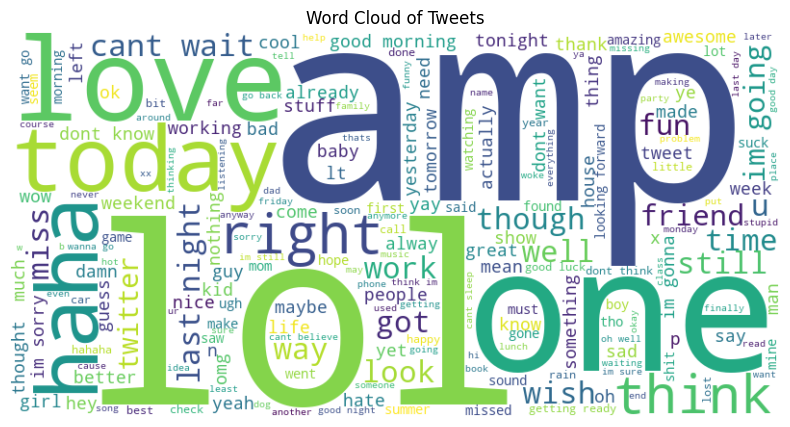

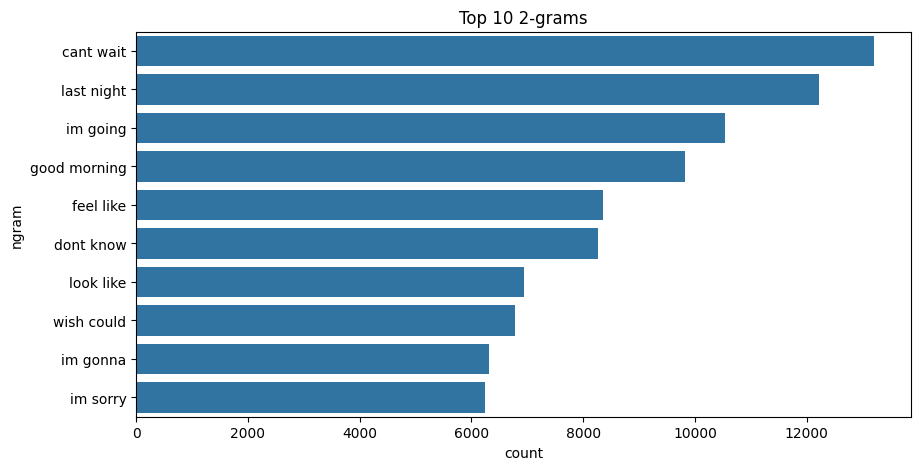

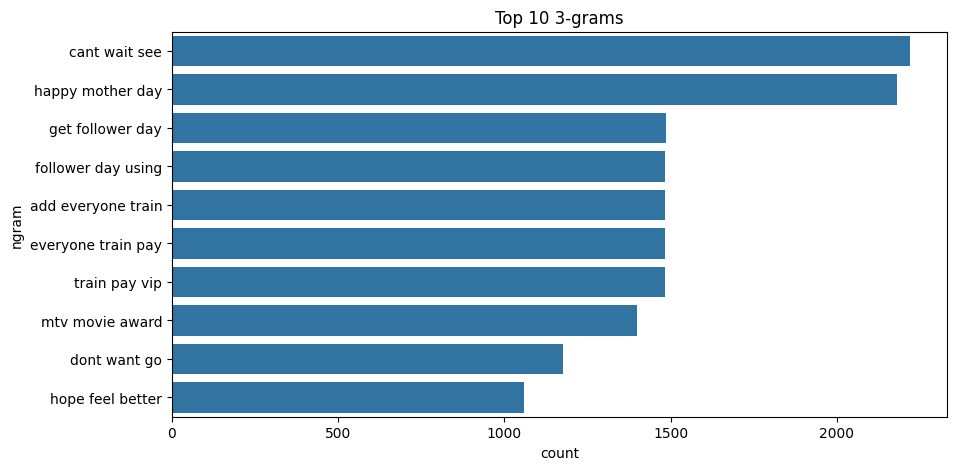

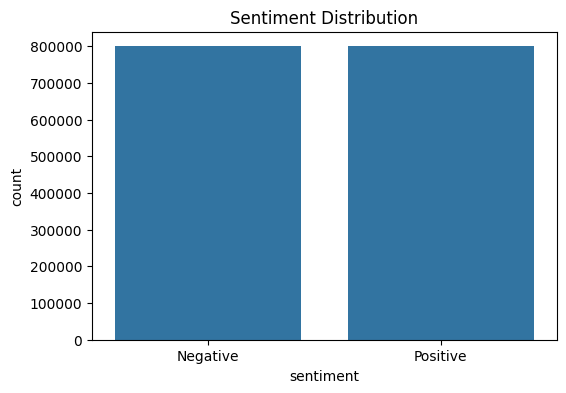

In [4]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import seaborn as sns
import nltk
import pandas as pd

# Word Cloud
all_words = ' '.join(df['cleaned_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Tweets')
plt.show()

# Fix for N-gram Frequency Plot
def plot_ngrams(text_series, n=2, top=10):
    ngram_list = []
    for text in text_series:
        tokens = text.split()
        ngram_list.extend(list(nltk.ngrams(tokens, n)))

    ngram_series = pd.Series(ngram_list).value_counts().head(top).reset_index()
    ngram_series.columns = ['ngram', 'count']
    ngram_series['ngram'] = ngram_series['ngram'].apply(lambda x: ' '.join(x))

    plt.figure(figsize=(10, 5))
    sns.barplot(x='count', y='ngram', data=ngram_series)
    plt.title(f'Top {top} {n}-grams')
    plt.show()

plot_ngrams(df['cleaned_text'], n=2, top=10)  # Bigrams
plot_ngrams(df['cleaned_text'], n=3, top=10)  # Trigrams

# Sentiment Distribution
df['sentiment'] = df['target'].apply(lambda x: 'Positive' if x == 4 else 'Negative')
plt.figure(figsize=(6, 4))
sns.countplot(x='sentiment', data=df)
plt.title('Sentiment Distribution')
plt.show()


In [6]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Define correct column names
column_names = ["target", "id", "date", "flag", "user", "text"]

# Load dataset with correct encoding and column names
df = pd.read_csv("sentiment140.csv", encoding="ISO-8859-1", names=column_names)

# Extract the text column
text_data = df["text"].astype(str)

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words="english")

# Transform the text data (this remains a sparse matrix)
X_tfidf = tfidf_vectorizer.fit_transform(text_data)

# Print shape to confirm size
print("TF-IDF matrix shape:", X_tfidf.shape)  # Should be (1600000, 5000)





TF-IDF matrix shape: (1600000, 5000)
